# Your Details

Your Name: Dylan Rodrigues

Your ID Number: 24121479

# Etivity 3 - Task 1-1: Use TensorFlow and Keras to build a CNN for dog vs. cat image classification

Until now, you've built your own L-layer models for DNN classification. Now we will use TensorFlow/Keras libraries to build a Convolutional Neural Network and use the in-built library functions to optimise the network. The TensorFlow Python Deep Learning videos [1] are very useful for learning how to use TensorFlow and Keras.


By the end of this notebook, you'll be able to: 

* Understand some semenatics of TensorFlow 
* Develop a basic CNN using the TensorFlow/Keras framework
* Use the ImageDataGenerator from TensorFlow for image preprocessing
* Apply Adam optimisation with random minibatches to accelerate convergence and improve optimisation
* Analyse the model perfromance
* Results analysis
* Store and Load your model architectures

### Let's get started!
**Start** with the TensorFlow basics in section [1] and [2] and then proceed to section [3] if you are comforable with TensorFlow.

    [1] Preliminary information 
    [2] NN's - Putting in into practice using TensorFlow basics 
    [3]~[9] Build a CNN model from this section [3] onwards - start with loading the necessary library support packages
    
   Much **Kudos** to the IHEC pratical deep Learning course for supplying the material in [1] & [2]

### Important Note on Submission 

There are code exercises to complete in this task. Use the notes provided to help you build understanding. Insert your code entries into the cell areas marked with the 'enter code here' text as below, so that grading can easily be assessed.

\### **ENTER CODE HERE**

Please make sure you are not doing the following:

1. You have not added any _extra_ `print` statement(s) in the assignment.
2. You have not added any _extra_ code cell(s) in the assignment (unless this is requetsed or you want to show the Tutor you've tried something)
3. You have not changed any of the function parameters.
4. You are not using any global variables inside your graded exercises. Unless specifically instructed to do so, please refrain from it and use the local variables instead.
5. You are not changing the assignment code where it is not required, like creating _extra_ variables.

## Table of Contents
- [1- Preliminary information](#1)
    - [1.1 - The Convolution Layer](#1-1)
    - [1.2 - The Pooling Layer](#1-1)
- [2- Neural Networks: Putting it into practice using TensorFlow](#1)
    - [2.1 - Tensors](#2-1)
    - [2.2 - TensorFlow Basics](#2-2)
    - [2.2 - The higher-level APIs](#2-3)
- [3- Packages](#3)
    - [3.1 - Prepare the Dataset](#3-1)
- [4 - Build and train a basic CNN using TensorFlow/Keras](#4)
    - [4.1 - Build the CNN model](#4-1)
    - [4.2 - Compile the CNN model and train the network](#4-2)
- [5 - Analyze model performance: Loss, predictions and confusion matrix](#5)
    - [5.1 - Plot the model loss and accuracy performance¶](#5-1)
    - [5.2 - Generate the predictions and plot the confusion matrix](#5-2)
- [6 - Results analysis](#6)
- [7 - Test your own image](#7)
- [8 - Save the model and weights](#8)
- [9 - Load the model and weights](#9)


## 1. Preliminary information 

In addition to the number of hidden layers in a model, deep learning also uses a few extra layer types in Convolutional Neural Networks to help with managing large volumes of input data while maintaining model complexity under some degree of control. We will discuss two of these now.


### 1.1 The Convolution Layer

Convolution layers are based on a small **convolution kernel** (ex: a 3x3 matrix) which is used as a sliding window over the input data. The weights that compose the kernel are multiplied with the matching input values under the sliding window and added together before the sum is meaned. The point of this is that this will generate an **activation map**: an input-shaped output with higher values where the input shows a specific feature that the kernel is designed to highlight (ex: horizontal lines, vertical lines, curve...).

Convolution kernels are very powerful and can generate many useful activation maps. When used in a deep learning model, we will simply define the shape of the convolution kernel, and let the training work out which specific combination of weights works out best in order to predict the output.

Compared to a standard "dense" hidden layer, this is very economical in terms of parameters! A 3x3 convolution kernel only contains 9 weights + 1 bias  parameter to train, and it can be applied the same to a 10x10 input or a 200x200 input. Think of how many weights you would need for a dense layer!

The code below shows the effect of some convolution kernels on an image. Feel free to play with the kernels:

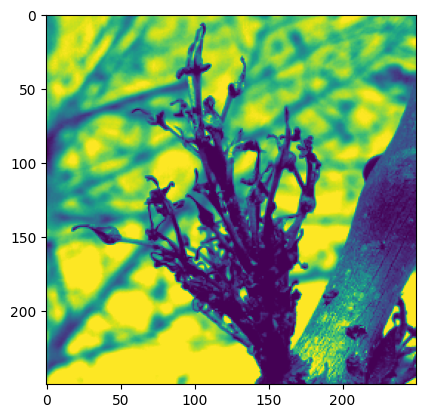

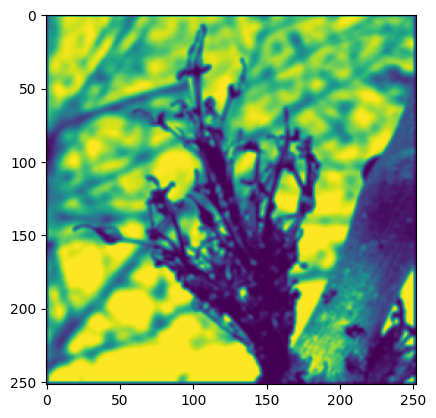

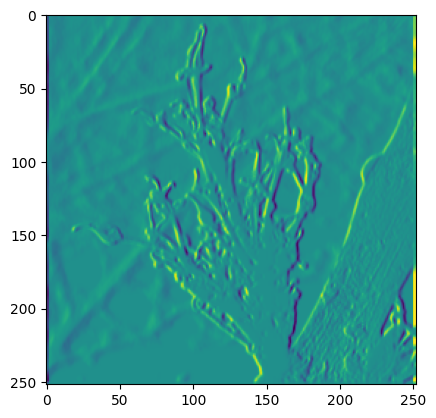

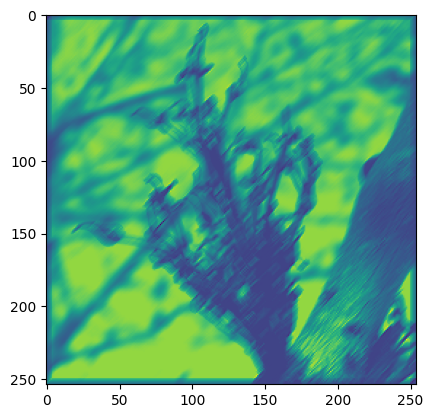

In [1]:
# playing with convolution kernels

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy import signal

# read source image, and take a single channel
img = mpimg.imread('images/ash1.png')[:,:,2] # 0=red, 1=green, 2=blue
plt.imshow(img)
plt.show()

# define various 2d convolution kernels
kernel_blur = np.array(
    [[ .1, .1, .1 ],
     [ .1, .2, .1 ],
     [ .1, .1, .1 ]])

kernel_edges = np.array(
    [[ -1, 0, 1 ],
     [ -1, 0, 1 ],
     [ -1, 0, 1 ]])

kernel_custom = np.array(
    [[  0.0,  0.0,  0.0, -1.0,  3.0 ],
     [  0.0,  0.0, -1.0,  3.0, -1.0 ],
     [  0.0, -1.0,  3.0, -1.0,  0.0 ],
     [ -1.0,  3.0, -1.0,  0.0,  0.0 ],
     [  3.0, -1.0,  0.0,  0.0,  0.0 ]])

# convolve and display
convolved = signal.convolve2d(img, kernel_blur)
plt.imshow(convolved)
plt.show()

convolved = signal.convolve2d(img, kernel_edges)
plt.imshow(convolved)
plt.show()

convolved = signal.convolve2d(img, kernel_custom)
plt.imshow(convolved)
plt.show()


### 1.2 The Pooling Layer

Pooling is a down-sampling techniques used to reduce the size of the data as it goes across the network, so that it ends up small enough to be practically used as input in a dense layer. The most commonly used pooling function, **max-pooling**, uses a sliding window across the data, reducing the values under the window into a single value by selecting the maximum value. Used after a convolution layer, it downsamples the activation map by keeping the highest activations over each sampled region.

![2x2 pooling example with stride 2](images/pooling_stride2.png)




## 2. Neural Networks: Putting it into practice using TensorFlow

In this lab session, we aim to introduce TensorFlow as intuitively as possible by coding a few simple networks. We will start with the basic building blocks, the tensors, if only to show how they compare to numpy arrays. We will then take advantage of the in-built higher level APIs to leverage TensorFlow for complex models with very little code. A lot of the code on display here comes from the official [TensorFlow tutorials](https://www.tensorflow.org/tutorials) which you are encouraged to go through for more introductory hands-on.



## 2.1. Tensors

First, let's address a vocabulary issue. We're going to work with Tensors, but don't let that make you think it's totally new. You may have encountered these already, you just knew them as multi-dimensional *arrays* or *matrices*.

A Tensor is just that: an extension of an array or matrix with extra dimensions. It is characterised by a number of properties:
 - A tensor **rank** is its number of dimensions, or the number of required indices to identify a specific value inside.
 - A tensor **shape** is the size of each of its respective dimensions, i.e. how many element it contains.
 - Also, in TF, a tensor's **dtype** is the type of the data it contains.

In [2]:
import tensorflow as tf
# some tensors, in all ranks, shapes and types

# ranks/shapes
print( tf.constant( [] ) )
print( tf.constant( [1] ) )
print( tf.constant(  7  ) )
print( tf.constant( [1,2,3] ) )
print( tf.constant( [[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]] ) )

# types
print( tf.constant( [[1,2],[3,4]] ) )
print( tf.constant( [[1.,2.],[3.,4.]] ) )
print( tf.constant( [[1,2],[3,4.]] ) )
print( tf.constant( ['there', 'can', 'be', 'only', 'one'] ) )
# try uncommenting this one too:
#print( tf.constant( ['there', 'can', 'be', 'only', 1] ) )

tf.Tensor([], shape=(0,), dtype=float32)
tf.Tensor([1], shape=(1,), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor(
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]], shape=(2, 2, 3), dtype=int32)
tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor([b'there' b'can' b'be' b'only' b'one'], shape=(5,), dtype=string)


### 2.2 TensorFlow basics

TensorFlow, at its core, is a tensor manipulation library. It implements a vast amount of operations in multidimensional-friendly fashion, and plays ball with that critical piece of hardware: the GPU.

Let's do some basic stuff, but through TensorFlow. Have a look at the output:

In [3]:
print(tf.add(1, 2))
print(tf.add([1, 2], [3, 4]))
print(tf.square(5))
print(tf.reduce_sum([1, 2, 3]))

# Operator overloading is also supported
print(tf.square(2) + tf.square(3))

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([4 6], shape=(2,), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(13, shape=(), dtype=int32)


In [4]:
tf.constant('this is a ') + tf.constant('test')

<tf.Tensor: shape=(), dtype=string, numpy=b'this is a test'>

We can see that even passing standard Python types, we get tensors back, with content, shape, and type.
We can also extract that information manually if needed:

In [5]:
x = tf.matmul([[1]], [[2, 3]])
print(x)
print(x.shape)
print(x.dtype)

tf.Tensor([[2 3]], shape=(1, 2), dtype=int32)
(1, 2)
<dtype: 'int32'>


Are you using numpy by the way? Because if so, you're in luck: numpy arrays and tensors generally convert to each other as needed:

In [6]:
ndarray = np.ones([3, 3])

print("## Manually convert a numpy arrays to a Tensor ##")
print(tf.convert_to_tensor(ndarray))

print("\n ## TensorFlow operations convert numpy arrays to Tensors automatically ##")
tensor = tf.multiply(ndarray, 42)
print(tensor)

print("\n ## And NumPy operations convert Tensors to numpy arrays automatically ##")
print(np.add(tensor, 1))

print("\n ## The .numpy() method explicitly converts a Tensor to a numpy array ##")
print(tensor.numpy())

## Manually convert a numpy arrays to a Tensor ##
tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]], shape=(3, 3), dtype=float64)

 ## TensorFlow operations convert numpy arrays to Tensors automatically ##
tf.Tensor(
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]], shape=(3, 3), dtype=float64)

 ## And NumPy operations convert Tensors to numpy arrays automatically ##
[[43. 43. 43.]
 [43. 43. 43.]
 [43. 43. 43.]]

 ## The .numpy() method explicitly converts a Tensor to a numpy array ##
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]]


However, where numpy arrays reside in standard memory, tensors can also reside on the GPU, so functions are provided to allow you to check:

In [7]:
x = tf.random.uniform([3, 3])

print("Is there a GPU available: "),
print(tf.config.experimental.list_physical_devices("GPU"))

print("Is the Tensor on GPU #0:  "),
print(x.device.endswith('GPU:0'))

Is there a GPU available: 
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Is the Tensor on GPU #0:  
True


### 2.3 The higher-level APIs

Implementing a complex deep learning network can be daunting. There are lots of bits and pieces that need to be set up, connected, and run in proper sequence. Now, while TensorFlow (TF) will allow you to devise your own custom model at a low level and fine tune the performance near the GPU, it is likely that for a long while, you'll only ever want to do "simple" stuff, such as deploy a model with an arbitrary number of layers, a defined optimiser, loss function, etc.

In order to do that, TensorFlow 2.x comes with two higher-level APIs that will spare you a lot of work and make your code easier to understand when you come back to it after your holidays!: **Keras**, and **estimators**. Both work as *model-level* APIs and allow you to focus on that part. Unless you get really deep (!) into deep learning, you may find that you won't ever need to go any further than these. For the rest of this notebook session, we will take a look at Keras, which TF recommends as a starting point.

**A note on Keras:** Keras is originally a third party framework that can run on top of either TensorFlow, Theano or Microsoft CNTK. This standalone version of Keras is still available, and possibly recommended if you want to ensure your code is kind-of platform-agnostic. However, a version of Keras is included in TensorFlow as part of the 2.X branch, and for simplicity, we'll use that one here. At this point in time, both versions work in similar fashion, and the exact same code can be run on either, with the exception of the module import lines.

## Let's begin the process of building a CNN model using TensorFlow/Keras - complete the code exercises in the cells where specified and include commentary when asked.

<a name='3'></a>
## 3- Packages and Dataset

This section is the beginning of the main lab exercises to prepare a dataset and build a CNN model using TensorFlow/Keras.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import math
import itertools
import os
import shutil
import random
import glob
import warnings
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix

from scipy import ndimage
from PIL import Image
from keras_cnn_app_utils import *

warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

**Use this code cell only if you have a GPU**

In [9]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


<a name='3-1'></a>
### 3.1- Prepare the dataset

The cat and dog images are organised into train/valid and test datasets. The train,valid,test sets contain 1000,150,100 random images respectively that are equally balanced with dog and cat images. The images are stored in the appropiate 'data/dogs-vs-cats/' folder paths. Use the following code cells to create this structure.

In [10]:
# Organise data into train, valid, test dirs
os.chdir('dataset')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
# Only use a small subset of the entire 25000 images available from the kaggle dataset
# 1000 images for training set
# 150  images for valid set
# 100  images for test set
    for i in random.sample(glob.glob('cat*'), 500):
        shutil.move(i, 'train/cat')      
    for i in random.sample(glob.glob('dog*'), 500):
        shutil.move(i, 'train/dog')
    for i in random.sample(glob.glob('cat*'), 75):
        shutil.move(i, 'valid/cat')        
    for i in random.sample(glob.glob('dog*'), 75):
        shutil.move(i, 'valid/dog')
    for i in random.sample(glob.glob('cat*'), 50):
        shutil.move(i, 'test/cat')      
    for i in random.sample(glob.glob('dog*'), 50):
        shutil.move(i, 'test/dog')

os.chdir('../')

In [11]:
train_path = 'dataset/train'
valid_path = 'dataset/valid'
test_path = 'dataset/test'

Next, we apply preprocessing to the image collection. Here, we will use TesorFlow's powerful ImageDataGenerator function to **preprocess images similar to what happens for the famous vgg16 model**. Note that TensorFlow/Keras has many useful supports for performing data augmentation tasks. Access the [web article](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks) if you are interested in learning more about the data augmentation capabilities [3]. Run the following code cells to preprocess the image data and plot some sample images.

In [12]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 150 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [13]:
assert train_batches.n == 1000
assert valid_batches.n == 150
assert test_batches.n == 100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [14]:
# Grab the images and labels from the training batch (10)
imgs, labels = next(train_batches)

In [15]:
# This function plots images in the form of a grid with 1 row and 10 colummns (from tensorflow site)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-120.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-122.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-104.68..140.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data 

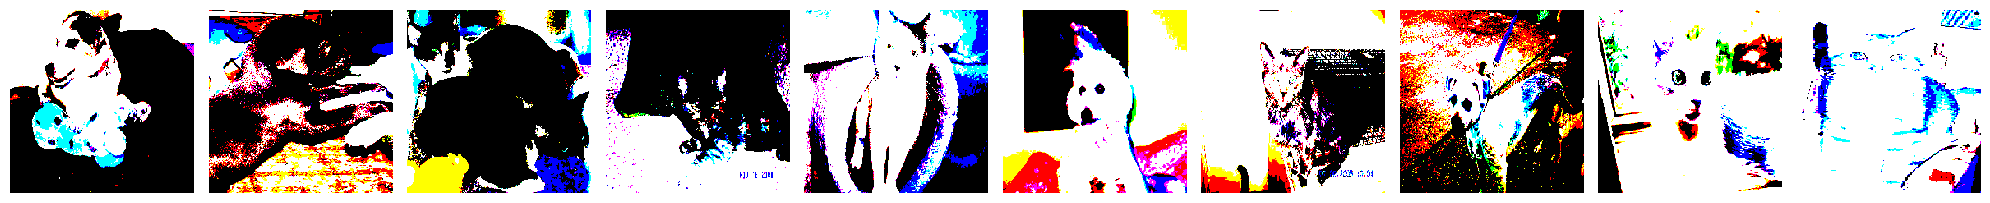

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [16]:
plotImages(imgs)
print(labels)

Notice how the RGB images have been refined (similar to what is done for **vgg16** network) before they are used for training.

<a name='4'></a>
## 4 - Build and train a basic CNN model using TensorFlow/Keras


In this step, you are required to build a simple CNN model that follows the architecture as shown in Figure 1. The model contains two Convolutional layers and two MaxPool layers. Finally the network is flattended into a 1-D structure before a softmax activation layer classifies the images to 2 outputs - dog and cat. 

<center><img src="images/CNN_simple_model.png" style="width:300px;height:500px;"></center>
<caption><center> <u> <b>Figure 1</b> </u>: <b>CNN model structure.</b><br></center></caption>

<br>
Note the input layer size is 224x224x3 (size of RGB image)

The structure of the network is as following
1. First Convolutional layer - use 32 filters with a 3x3 kernel size and 'same' padding with a relu activation function.
2. Use Max pooling with a kernel size of 2x2 and a stride of 2.
3. Second Convolutional layer - use 64 filters with a 3x3 kernel size and 'same' padding with a relu activation function.
4. Use Max pooling with a kernel size of 2x2 and a stride of 2.
5. Flatten the network
6. The final layer uses a softmax classifier for 2 output classes

<a name='4-1'></a>
### 4.1 Build the CNN model

1. Build the CNN model in the code cell below using a Keras **Sequential** model.

2. Report on the model.summary().

In [17]:
model = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same"),
    Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=2, activation="softmax")
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0

<br><span style='color: Black;'> **What is the total number of parameters for this CNN model?**</span> Provide an explanation in the markdown cell for the parameter count detailing how the number of weights and bias parameter amounts were calculated according to the layer need.

### <span style='color: red;'>ENTER COMMENTS HERE.</span> ###

The total number of parameters in this CNN model is 430,050, computed by summing the parameters from each layer. The first convolutional layer (Conv2D) applies 32 filters of size 3X3 to an input of shape (224, 224, 3), leading to (3X3X3)+1=28 parameters per filter and a total of 896 parameters. The second Conv2D layer, operating on an input of shape (224, 224, 32), also has 32 filters, each with (3X3X32)+1=289 parameters, resulting in 9,248 parameters. The first max-pooling layer has no learnable parameters. The third Conv2D layer increases the filter count to 64, with each filter having (3X3X32)+1=289 parameters, leading to 18,496 parameters. The second max-pooling layer also has no learnable parameters. The model then flattens the (56, 56, 64) feature map into a vector of 200,704 neurons before passing it to a fully connected (Dense) layer with two output neurons, resulting in 401,410 parameters. Summing these values gives a total of 430,050 parameters. This calculation aligns with the principles outlined in Andrew Ng’s Deep Learning Specialization and Ian Goodfellow’s Deep Learning, where convolutional layers learn spatial hierarchies through localized weight sharing, and fully connected layers contribute the bulk of the parameters.

<a name='4-2'></a>
### 4.2 Compile the CNN model and train the network

1. Use **model.compile()** to compile the CNN model using Adam optimization and a learning_rate = 0.0001. Also specify categorical_crossentropy as the loss function and report on the accuracy metric.


2. Use **history=model.fit()** with inputs 'x=train_batches' and 'steps_per_epoch=len(train_batches)'. Also set 'validation_data=valid_batches' as input, so that you can investigate the valid set loss/accuracy figure. This will be useful in determining the performance of this model. Use 10 epochs of 100 minibatch samples each to train the network.

In [19]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [20]:
len(train_batches)

100

In [21]:
# Note Generator inherently contains the y label values in train_batches, so there is no need to pass y data
# If you want to use the GPU to train the model quicker - use this line before the training "with tf.device('/GPU:0'):"
with tf.device('/GPU:0'):
    history = model.fit(x=train_batches, epochs=10, steps_per_epoch=len(train_batches), validation_data=valid_batches)

Epoch 1/10
100/100 [==============================] - 28s 83ms/step - loss: 9.8633 - accuracy: 0.5500 - val_loss: 1.7117 - val_accuracy: 0.6533
Epoch 2/10
100/100 [==============================] - 3s 27ms/step - loss: 0.7412 - accuracy: 0.7860 - val_loss: 1.9865 - val_accuracy: 0.5867
Epoch 3/10
100/100 [==============================] - 3s 26ms/step - loss: 0.2150 - accuracy: 0.9190 - val_loss: 1.5156 - val_accuracy: 0.6000
Epoch 4/10
100/100 [==============================] - 3s 26ms/step - loss: 0.0427 - accuracy: 0.9850 - val_loss: 1.4272 - val_accuracy: 0.5933
Epoch 5/10
100/100 [==============================] - 3s 26ms/step - loss: 0.0082 - accuracy: 0.9990 - val_loss: 1.4678 - val_accuracy: 0.5933
Epoch 6/10
100/100 [==============================] - 3s 26ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 1.4675 - val_accuracy: 0.6133
Epoch 7/10
100/100 [==============================] - 3s 26ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.4882 - val_accuracy: 0.613

<a name='5'></a>
## 5 - Analyse model performance: Loss, predictions and confusion matrix

Here, you will analsze the model performance for loss/accuracy. There are **two steps** to this section - The first step is to plot the model loss/accuarcy metrics. Refer to the general guideline in Figure 2 to provide an explanation for what is going on with this model. 


**<center>Recall the general guidance for dealing with bias and variance</center>**
<center><img src="images/bias_variance_effects.jpg" style="width:450px;height:200px;"></center>
<caption><center> <u> <b>Figure 2</b> </u>: <b>Dealing with bias and variance in your model [2].</b><br></center></caption>
<br>The second step involves plotting the confusion matrix and explaining the model performance on the test set.

<a name='5-1'></a>
### 5.1 Plot the model loss and accuracy performance

**Plot** the model loss and accuracy metrics in the code cell below

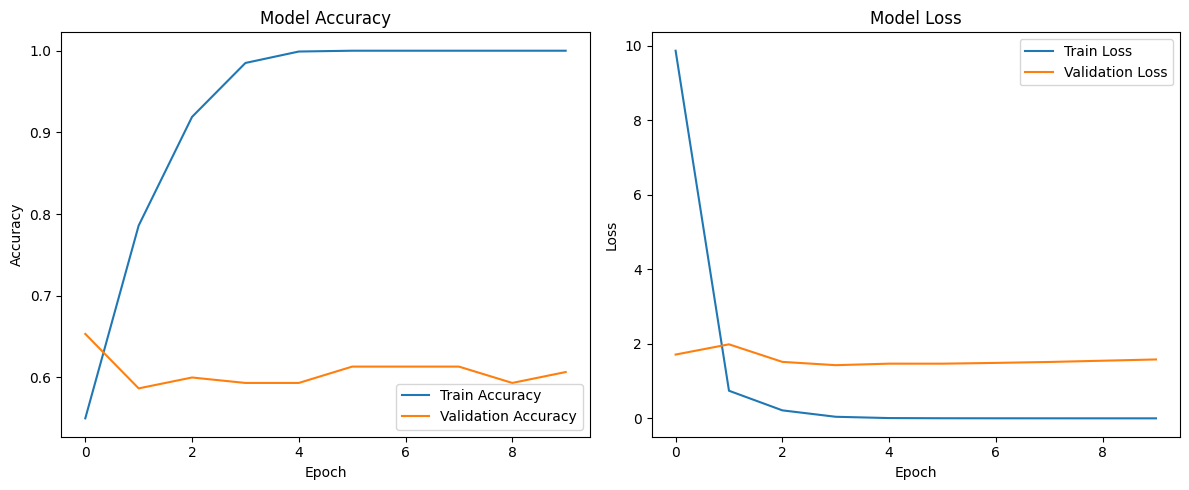

In [22]:
import matplotlib.pyplot as plt

def plot_model_performance(history):
    """
    Plots the training and validation accuracy and loss from the model history in a single figure.

    Parameters:
    history: History object from model.fit() containing loss and accuracy metrics.
    """
    # Create a figure with two subplots (1 row, 2 columns)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plot accuracy (left subplot)
    axes[0].plot(history.history['accuracy'], label='Train Accuracy')
    axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[0].set_title('Model Accuracy')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_xlabel('Epoch')
    axes[0].legend(loc='lower right')

    # Plot loss (right subplot)
    axes[1].plot(history.history['loss'], label='Train Loss')
    axes[1].plot(history.history['val_loss'], label='Validation Loss')
    axes[1].set_title('Model Loss')
    axes[1].set_ylabel('Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].legend(loc='upper right')

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

# Function invocation
plot_model_performance(history)


**What** do these plots reveal about the CNN model performance? Is the design underfitting or overfitting? Suggest a potential remedy to improve performance (no need to code).
**Enter your observations in the markdown cell**

### <span style='color: red;'>ENTER COMMENTS HERE.</span> ###

The provided loss and accuracy plots indicate that the CNN model is experiencing severe overfitting. The training accuracy rapidly reaches near 100%, while the validation accuracy stagnates at approximately 60%, suggesting that the model memorizes the training data but fails to generalize to unseen data. Similarly, the training loss decreases sharply and remains low, whereas the validation loss exhibits fluctuations and a slight upward trend, further reinforcing the overfitting hypothesis. According to Ian Goodfellow et al. (2016), such a scenario arises when the model has excessive capacity relative to the dataset size, leading to high variance. Andrew Ng’s guidance on bias-variance trade-off suggests regularization techniques such as L2 weight decay, dropout, and data augmentation as potential remedies. Reducing model complexity by decreasing the number of parameters, changing the architecture (for ex, adjusting the architecture by reducing the number of convolutional filters, decreasing the depth of the network, or introducing batch normalization can help regulate the model’s capacity) or introducing early stopping can also mitigate overfitting, enhancing generalization.

<a name='5-2'></a>
### 5.2 Generate the predictions and plot the confusion matrix

1. Analyse the predictions by using the **model.predict()** function call on the test_batches dataset. Note that the output of the CNN model is a probability (float) value ranging from 0.0 to 1.0. Recall we have 2 output nodes for a separate 'cat' and 'dog' classification, so if the probability of output 1 (cat feature) is greater than 0.5, then this is more likely to be a 'cat' classification. Whereas, if the probability of output 2 (dog feature) is greater than 0.5, then the model is predicting the image as a 'dog' classification. You might find it useful to round the predictions to a '0' for a cat or '1' for a dog' into a 1-D array for the confusion matrix setup.

In [23]:
# 1. Calculate the predictions on the test_batches set from the trained model using model.predict()
# 2. Round the prediction probabilities to a value 0 (cat) or 1 (dog) into a 1-D array
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def get_predictions(model, test_batches):
    """
    Generates predictions on the test dataset.

    Parameters:
    model : Trained CNN model
    test_batches : Image dataset for testing

    Returns:
    np.ndarray: Predicted class labels (0 for cat, 1 for dog)
    np.ndarray: True class labels from the test set
    """
    predictions = model.predict(test_batches)
    # Convert probabilities to class labels
    predicted_labels = np.argmax(predictions, axis=1)
    # Actual labels
    true_labels = test_batches.classes
    
    return predictions, predicted_labels, true_labels


# Function calls
predictions, predicted_labels, true_labels = get_predictions(model, test_batches)

print("Predictions: ", predictions)
print("Predicted Labels: ", predicted_labels)
print("True Labels: ", true_labels)

10/10 [==============================] - 1s 78ms/step
Predictions:  [[8.96338344e-01 1.03661694e-01]
 [9.99522090e-01 4.77866124e-04]
 [9.59156174e-03 9.90408421e-01]
 [9.58511326e-03 9.90414858e-01]
 [6.19647264e-01 3.80352736e-01]
 [1.14391214e-05 9.99988556e-01]
 [9.49481666e-01 5.05183227e-02]
 [1.22800100e-06 9.99998808e-01]
 [9.61275816e-01 3.87241393e-02]
 [9.98827040e-01 1.17289403e-03]
 [5.68703353e-01 4.31296587e-01]
 [7.65074193e-01 2.34925792e-01]
 [5.20427346e-01 4.79572624e-01]
 [6.00464875e-04 9.99399543e-01]
 [8.75314139e-03 9.91246879e-01]
 [9.99987841e-01 1.21999110e-05]
 [5.04834294e-01 4.95165765e-01]
 [9.71439779e-01 2.85601951e-02]
 [6.58672725e-05 9.99934077e-01]
 [6.32066965e-01 3.67933005e-01]
 [3.00834212e-03 9.96991634e-01]
 [6.04335725e-01 3.95664304e-01]
 [4.90615666e-01 5.09384334e-01]
 [5.44935167e-01 4.55064863e-01]
 [7.78490126e-01 2.21509904e-01]
 [8.75860274e-01 1.24139734e-01]
 [8.06043804e-01 1.93956196e-01]
 [9.99251068e-01 7.48928869e-04]
 [1.9433

2. Plot the performance of the predictions using a **confusion matrix**. Use the sklearn.metrics confusion_matrix() command with the test_batches correct predictions and predictions from the trained model as inputs. Label the plot correctly and analyze the result - what does this plot inform you about the level of model performance?
**Note**: You can use the plot_confusion_matrix() routine in the keras_cnn_app_utils.py file.

Confusion matrix, without normalization
[[34 16]
 [16 34]]


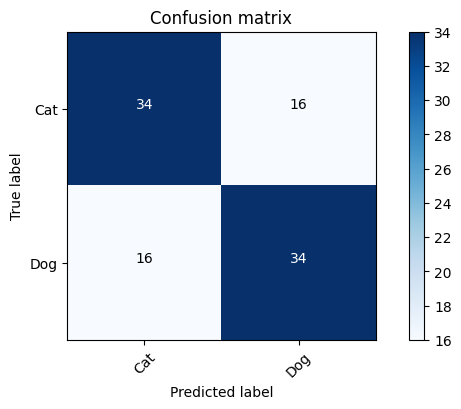

In [25]:
### ENTER CODE HERE
# 1. Use the confusion matrix() from sklearn.metrics to get the cm values
# 2. Plot the performance of the predictions using the plot_confusion_matrix() routine


from sklearn.metrics import confusion_matrix

def compute_confusion_matrix(true_labels, predicted_labels):
    """
    Computes the confusion matrix.

    Parameters:
    true_labels : Array of actual class labels
    predicted_labels : Array of predicted class labels

    Returns:
    np.ndarray: Confusion matrix values
    """
    return confusion_matrix(true_labels, predicted_labels)

# Compute confusion matrix
cm = compute_confusion_matrix(true_labels, predicted_labels)

# Calling the provided function to plot the confusion matrix
class_names=["Cat", "Dog"]
plot_confusion_matrix(cm, class_names)

Note: in the bottome left section of the confusion matrix, 21 cannot be seen clearly. Please check carefully.

**What story does the confusion matrix tell** - Place your commentary on the confusion matrix in the markdown cell below.

### <span style='color: red;'>ENTER COMMENTS HERE.</span> ###


The confusion matrix provides insight into the performance of a binary classifier distinguishing between "Cat" and "Dog" images. The model correctly classifies 34 instances of each class but misclassifies 16 cases in both directions (i.e., predicting "Dog" as "Cat" and vice versa). This results in an accuracy of  68%, which indicates moderate performance. However, given the balanced error distribution, the classifier struggles equally with both categories, suggesting that improvements such as more training data, better feature extraction, or hyperparameter tuning could be beneficial. As Andrew Ng emphasizes in his Coursera Deep Learning Specialization, evaluating performance via confusion matrices provides a deeper understanding of classification errors compared to accuracy alone [1]. Further steps, such as analyzing precision, recall, and F1-score, can help determine whether the model's misclassifications are more detrimental in specific applications.

**References:**  
[1] A. Ng, “Deep Learning Specialization,” Coursera, 2017.

<a name='6'></a>
##  6 - Results Analysis

Let's take a look at some of the images the CNN model labeled incorrectly. Use the code provided to reload the test data set as original RGB (no prepocessing) images and then display the incorrectly classified images.

In [27]:
def load_testset():
    # load the original rgb images into a test set
    size = 224
    X_test = []
    Y_test = []
    
    testpath = "./dataset/test/cat"
    file = os.listdir(testpath)
    files = gb.glob(pathname = str( testpath + '/*.jpg'))
    
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (size,size))
        X_test.append(list(image_array))
        file=file.split('\\')[-1]
        sep=file.split('.')[0]
        if(sep == 'cat'):
            Y_test.append(0)
        else:
            Y_test.append(1)
            
    testpath = "./dataset/test/dog"
    file = os.listdir(testpath)
    files = gb.glob(pathname = str( testpath + '/*.jpg'))
    
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (size,size))
        X_test.append(list(image_array))
        file=file.split('\\')[-1]
        sep=file.split('.')[0]
        if(sep == 'dog'):
            Y_test.append(1)
        else:
            Y_test.append(0)
     
    X_test = np.array(X_test);
    test_y = np.array(Y_test);
    test_x = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],X_test.shape[3]);
    classes = ['cat', 'dog'];
    
    return test_x, test_y, classes

In [28]:
# load the raw rgb image test set and reshape into a flattened rgb value - first reshape image samples to [224,224,3,100]
test_x, test_y, classes = load_testset()
test_x1 = test_x.reshape(test_x.shape[1],test_x.shape[2],test_x.shape[3],test_x.shape[0])
# flatten rgb values
test_x_flatten = test_x1.reshape(test_x1.shape[3],-1).T

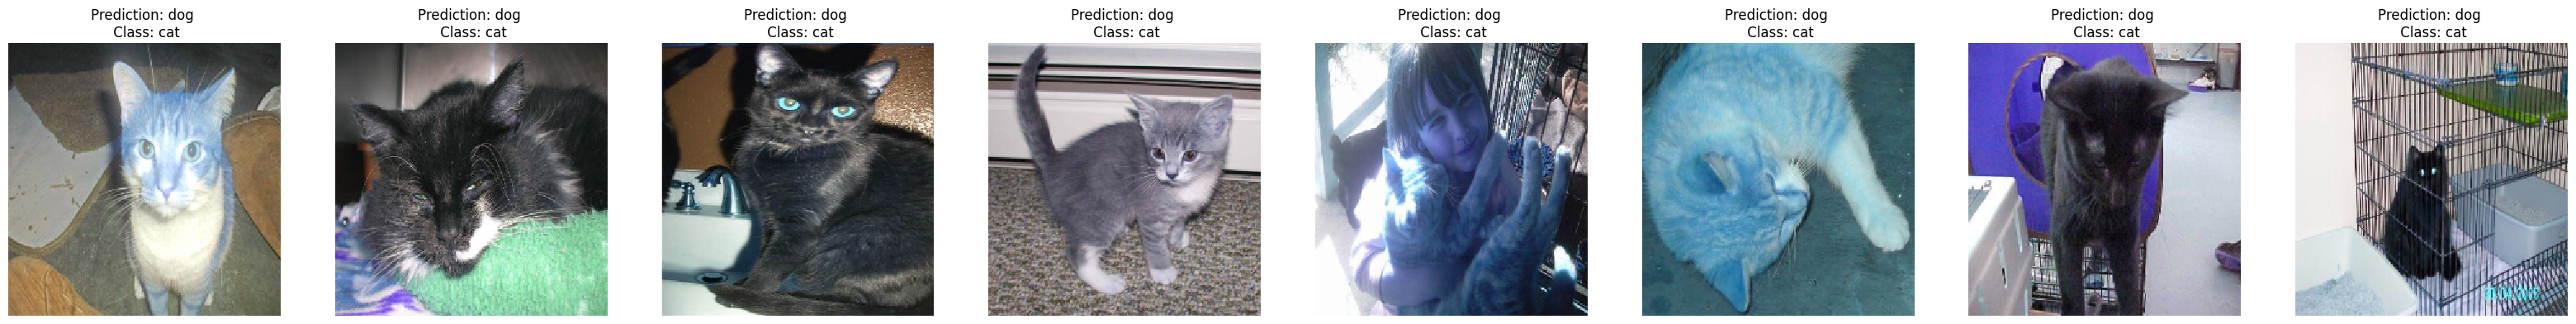

In [29]:
classes = ['cat','dog']
# use the predictions from the processed test_batches image dataset
print_mislabeled_images(classes, test_x_flatten, test_y, np.argmax(predictions, axis=-1))
plt.show()

**In the markdown below, list some reasons why these images do poorly using this CNN model?**

### <span style='color: red;'>ENTER COMMENTS HERE.</span> ###


<a name='7'></a>
## 7 - Test with your own image (optional/ungraded exercise)

From this point, if you so choose, you can use your own image to test  the output of your model. To do that follow these steps:

1. Click on "File" in the upper bar of this notebook, then click "Open" to go on your home directory.
2. Add your image to this Jupyter Notebook's directory, in the "images" folder
3. Change your image's name in the following code
4. Run the code and check if the algorithm is right (1 = dog, 0 = cat (non-dog))!

y = 0, your first CNN model predicts a "cat" picture!


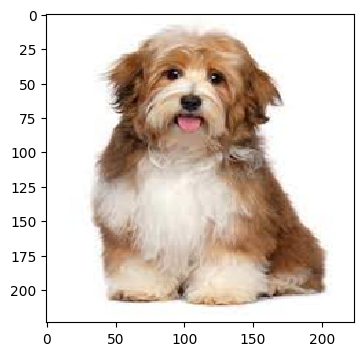

In [30]:
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
my_image = "my_image_dog.jpg" # change this to the name of your image file 
num_px = 224
fname = "images/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)

image = image.reshape((1,num_px,num_px,3))

my_predicted_image = model.predict(x=image,verbose=0)
my_prediction = np.argmax(my_predicted_image, axis=-1)
print ("y = " + str(np.squeeze(my_prediction)) + ", your first CNN model predicts a \"" + classes[int(np.squeeze(my_prediction))] +  "\" picture!")

<a name='6'></a>
##  8 - Save model

This is useful if you want to save your model details

In [31]:
# The model and weights are saved to the disk if files do not exists
import os.path
if os.path.isfile('models/cat_vs_dog_cnn1_model.keras') is False:
    model.save('models/cat_vs_dog_cnn1_model.keras')
    
# Note model already contains the weights, but showing how it can done seprately    
if os.path.isfile('models/cat_vs_dog_cnn1_weights.h5') is False:
    model.save_weights('models/cat_vs_dog_cnn1_weights.h5')

<a name='9'></a>
##  9 - Load model (if we need to resume)

This is useful if you want to resume from a pre-saved model.

In [34]:
# This loads the complete model - architecture, weights and training configuration (loss, optimiser). 
# The state of the optimiser also allows the model to resume training where it left off!
from tensorflow.keras.models import load_model
new_model = load_model('models/cat_vs_dog_cnn1_model.keras')
new_model.summary()

# We can also load the weights separately, provided we use the same model architecture that was used for these weights.
new_model.load_weights('models/cat_vs_dog_cnn1_weights.h5')
#new_model.get_weights()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 200704)           

**Congratulations**! You've made it to the end of the notebook for designing a simple CNN using the TensorFlow/Keras Framework. Here's a quick recap of everything you're now able to do: 

* Create a basic CNN model architecture
* Use mini-batches for your training set 
* Analyse CNN model performance using accuracy plots and a confusion matrix
* Results analysis for mislabeled images
* Save (& load) your models

Great work!

**References**:

- [1] TensorFlow Python Deep Learning Framework videos: https://www.youtube.com/playlist?list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL
- [2] Deep Learning Explained videos: https://www.youtube.com/playlist?list=PLcWfeUsAys2nPgh-gYRlexc6xvscdvHqX
- [3] Data Augmentation using Tensorflow: https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/